In [1]:
from schmeud import qlm
import gsd.hoomd

import matplotlib.pyplot as plt

import numpy as np
import itertools

import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches

In [79]:
def show_2d_packing(snap, vec=None, scale=1.0, norm=False, log=False, ax=None, log_min=-5.0):

    if snap.configuration.dimensions != 2:
        raise ValueError("Snapshot must be 2D")

    if vec is not None:
        N = snap.particles.N
        vec_shape = vec.shape
        if N != vec_shape[0] or vec_shape[1] != 2:
            raise ValueError("Vector must be of shape (N, 2)")

    if ax is None:
        fig, ax = plt.subplots()

    ax.set_aspect('equal', adjustable='box')

    patch_list = []
    for v, d in zip(snap.particles.position, snap.particles.diameter):
        patch_list.append(matplotlib.patches.Circle(v, radius=d/2, alpha=0.5))
    if vec is not None:
        vec_shape = vec.shape
        if norm:
            scale = 1/np.linalg.norm(vec)
        for v, dv in zip(snap.particles.position, vec):
            if log:
                norm = np.linalg.norm(dv)
                log_clip = np.log(norm) - log_min
                if log_clip < 0.0:
                    continue
                dv = log_clip*dv/norm
            dv1 = dv * scale
            patch_list.append(matplotlib.patches.Arrow(v[0], v[1], dv1[0], dv1[1], color='k'))
    p = PatchCollection(patch_list, match_original=True)
    ax.add_collection(p)

    box = snap.configuration.box
    Lx = box[0]
    Ly = box[1]
    ax.set_xlim(-Lx/2, Lx/2)
    ax.set_ylim(-Ly/2, Ly/2)


def show_2d_packing_alpha(snap, vec=None, scale=1.0, log=False, ax=None, log_min=-5.0):

    if snap.configuration.dimensions != 2:
        raise ValueError("Snapshot must be 2D")

    if vec is not None:
        N = snap.particles.N
        vec_shape = vec.shape
        if N != vec_shape[0] or vec_shape[1] != 2:
            raise ValueError("Vector must be of shape (N, 2)")

    if ax is None:
        fig, ax = plt.subplots()

    ax.set_aspect('equal', adjustable='box')

    patch_list = []
    if vec is not None:
        vec_shape = vec.shape
        for v, d, dv in zip(snap.particles.position, snap.particles.diameter, vec):
            if log:
                norm = np.linalg.norm(dv)
                log_clip = np.log(norm) - log_min
                if log_clip < 0.0:
                    continue
                dv = log_clip*dv/norm
            dv1 = dv * scale
            patch_list.append(matplotlib.patches.Circle(v, radius=d/2, alpha=np.clip(np.linalg.norm(dv1), 0.0, 1.0), color='k'))
    for v, d in zip(snap.particles.position, snap.particles.diameter):
        patch_list.append(matplotlib.patches.Circle(v, radius=d/2, alpha=0.5))
    p = PatchCollection(patch_list, match_original=True)
    ax.add_collection(p)

    box = snap.configuration.box
    Lx = box[0]
    Ly = box[1]
    ax.set_xlim(-Lx/2, Lx/2)
    ax.set_ylim(-Ly/2, Ly/2)

    ax.set_axis_off()

In [3]:
pair = qlm.BidispHertz()
qlm_comp = qlm.QLM(pair)

In [11]:
# snap = gsd.hoomd.Snapshot()
# Nx = 25
# points = np.linspace(-Nx/2, Nx/2, Nx, endpoint=False)
# pos_xy = list(itertools.product(points, points))
# pos = np.zeros((len(pos_xy), 3))
# pos[:, :2 ] = np.array(pos_xy)
# pos[:, :2] += .5
# snap.particles.position = pos
# snap.particles.N = len(snap.particles.position)
# snap.configuration.dimensions = 2
# snap.configuration.box = [Nx,Nx,0,0,0,0]
# snap.particles.types = ["A"]
# snap.particles.typeid = np.ones(len(snap.particles.position), dtype=int)
# snap.particles.diameter = np.ones(len(snap.particles.position), dtype=float) * 1.4

# N = len(pos)

In [26]:
snap = gsd.hoomd.open("data/traj.gsd")[0]
N = snap.particles.N

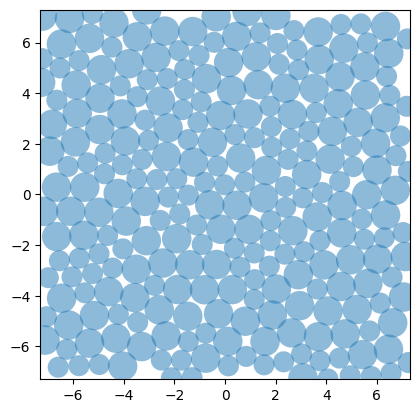

In [27]:
show_2d_packing(snap)

In [7]:
snap.particles.N

625

In [89]:
eig_vals, eig_vecs, blah = qlm_comp.compute(snap, k=512, filter=False, sigma=0, dense=True)

In [48]:
eig_vals[:3]

array([-3.80898867e-16,  8.35819201e-17,  2.16741840e-02])

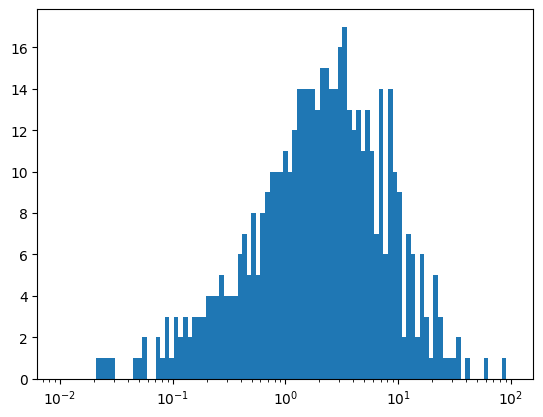

In [94]:
plt.hist(eig_vals[2:], bins=np.logspace(-2, 2, 100))
# plt.yscale('log')
plt.xscale('log')

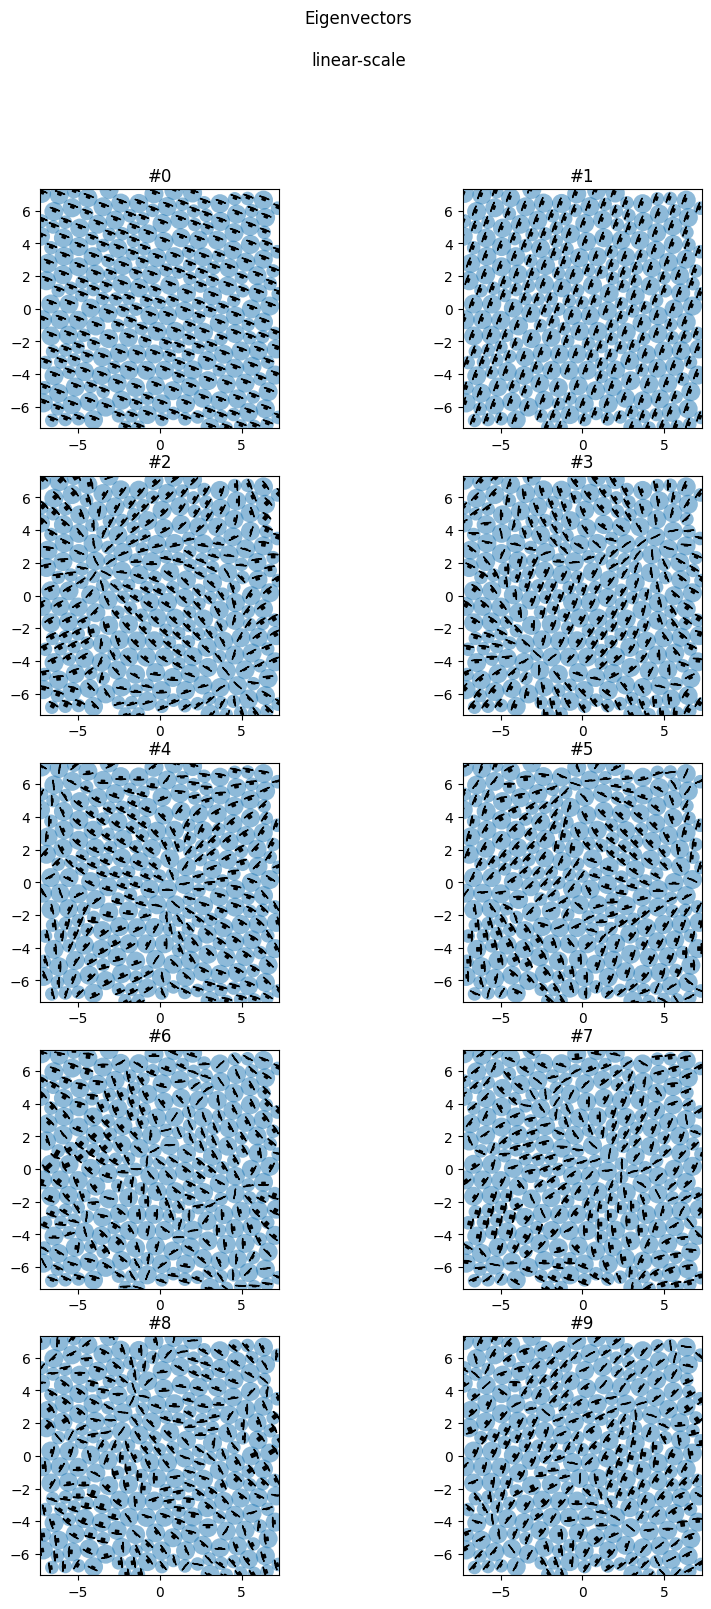

In [93]:
fig, axs = plt.subplots(5, 2, figsize=(10, 18))

fig.suptitle("Eigenvectors\n\nlinear-scale")

axs = axs.flatten()

for i, (vec, ax) in enumerate(zip(eig_vecs[:10], axs)):
    # print(np.linalg.norm(vec))
    show_2d_packing(snap, vec=vec.reshape(N, 2), log=False, scale=3.0, ax=ax)
    ax.set_title(f"#{i}")
    # plt.title(f"Jammed packing eigenvec={i}, pre-filtering, norm={np.linalg.norm(vec)}")

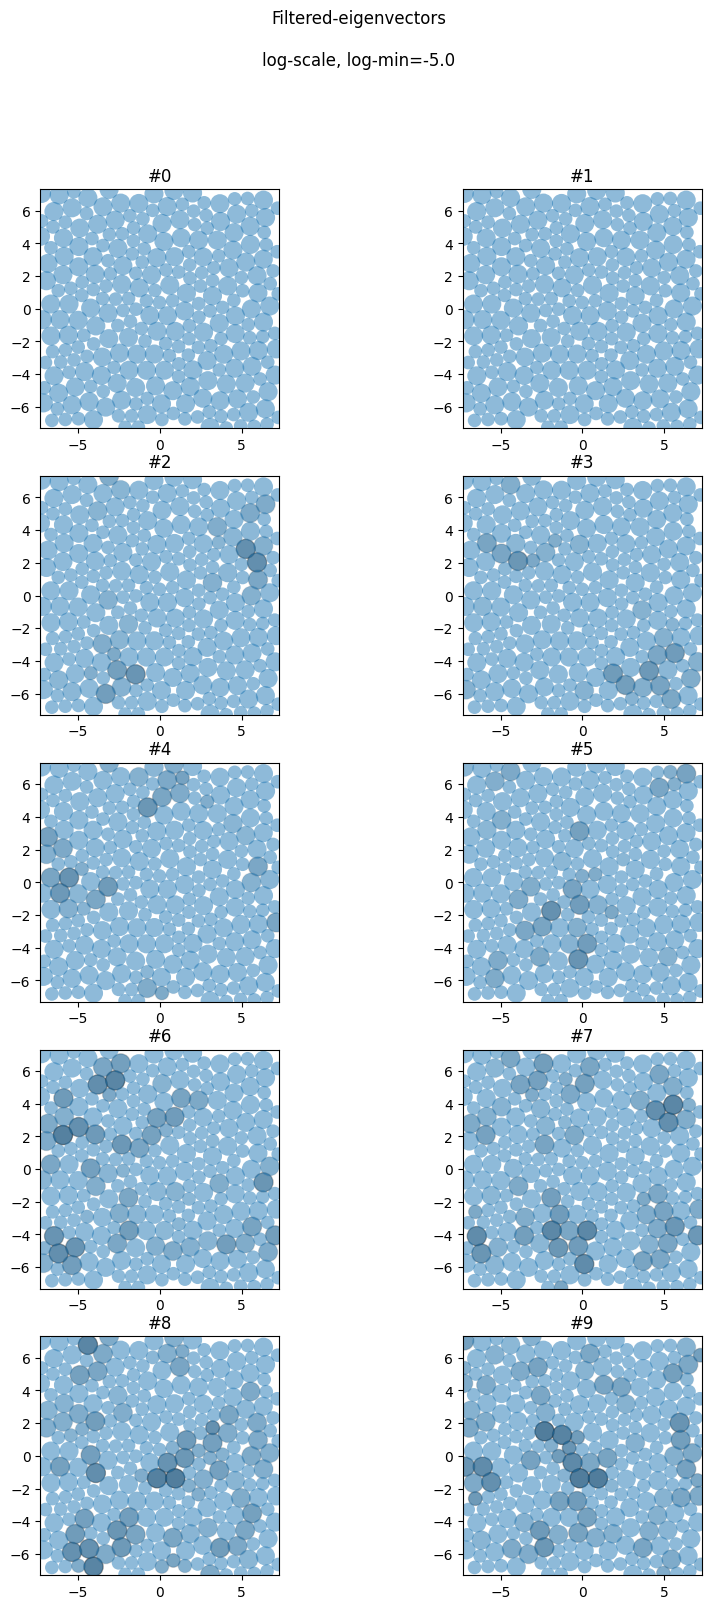

In [81]:
fig, axs = plt.subplots(5, 2, figsize=(10, 18))

fig.suptitle("Filtered-eigenvectors\n\nlog-scale, log-min=-5.0")

axs = axs.flatten()

for i, (vec, ax) in enumerate(zip(eig_vecs[:10], axs)):
    # print(np.linalg.norm(vec))
    show_2d_packing_alpha(snap, vec=vec.reshape(N, 2), scale=0.2, log=True, ax=ax)
    ax.set_title(f"#{i}")
    # plt.title(f"Jammed packing eigenvec={i}, pre-filtering, norm={np.linalg.norm(vec)}")

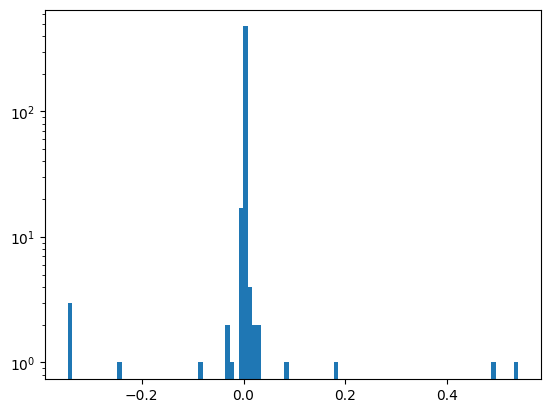

In [33]:
plt.hist(eig_vecs[5], bins=100)
plt.yscale('log')